# **Impact of Coworking Spaces on Social Wellbeing Indicators**
**Authored by:** Thakoor Madhuvaishali

**Duration:** 150 mins

**Level:** Intermediate to Advanced

**Pre-requisite Skills:** Python, Data Analysis, Data Cleaning, Data Visualization, Machine Learning

Scenario:

As a community researcher, I want to analyze the impact of coworking spaces on social wellbeing indicators. Many individuals use coworking spaces not only for professional purposes but also for the social interactions and support they provide. Understanding this impact can help policymakers and business owners create environments that foster community wellbeing and collaboration.

What this use dase will teach you

At the end of this use case, you will:

*   Learn how to use Python for analyzing and visualizing social wellbeing indicators in relation to coworking spaces.

*   Gain experience in statistical analysis to evaluate the relationships between coworking space proximity and social wellbeing outcomes.

*   Understand how to integrate and analyze multiple datasets to provide insights into the effectiveness of coworking spaces as support environments.


Introduction:

Coworking spaces have emerged as vital hubs for freelancers, entrepreneurs, and remote workers, offering more than just a place to work. These spaces foster social connections, collaboration, and community engagement, which can significantly impact social wellbeing. This use case aims to explore how proximity to coworking spaces correlates with social wellbeing indicators, such as mental health, social interaction, and community support.

By analyzing datasets related to social wellbeing indicators and the locations of coworking spaces, this project will provide valuable insights into how these environments contribute to individual and community health. The results can inform stakeholders about the benefits of coworking spaces and help optimize their locations and services to better support community wellbeing.

Datasets List:

Social Wellbeing Indicators - https://data.melbourne.vic.gov.au/explore/dataset/social-indicators-for-city-of-melbourne-residents-2023/information/

This dataset includes various social wellbeing metrics, such as mental health status, community engagement, and access to support services. It captures responses from different demographic groups and allows for analysis based on proximity to coworking spaces.

Coworking Space Locations - https://data.melbourne.vic.gov.au/explore/dataset/coworking-spaces/information/

This dataset provides the geographic locations of coworking spaces in the area, including their amenities and services. It is crucial for understanding how accessibility to these spaces influences social wellbeing.

Postcode dataset - https://data.melbourne.vic.gov.au/explore/dataset/postcodes/information/

The postcode dataset contains the latitude and longitude coordinates for postcodes within the City of Melbourne. This geographic data will allow us to map the exact locations of different postcodes enabling analysis of how social wellbeing indicators vary across different areas based on their proximity to coworking spaces.




# **Importing modules and fetching data from Open Data Melbourne**

In [2]:
#importing all the modules
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from branca.element import Template, MacroElement
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display


In [3]:
#fetching coworking spaces dataset
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='coworking-spaces'

url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    df_coworking=pd.read_csv(StringIO(url_content),delimiter=';')
    print(df_coworking.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

      organisation                                            address  \
0       11th Space              11/568 Collins St, Melbourne VIC 3000   
1      360 Collins                 360 Collins Street, Melbourne 3000   
2  Christie Spaces                 454 Collins St, Melbourne VIC 3000   
3      The Cluster         Level 17, 31 Queen Street, Melbourne, 3000   
4    Hatch Quarter  Innovation Hub 7/677 La Trobe Street, Dockland...   
5              Hub  Collins Street: Georges Building, Mezzanine an...   
6            Regus                  385 Bourke Street, Melbourne 3000   
7            Regus                 367 Collins Street, Melbourne 3000   
8            Regus                180 Lonsdale Street, Melbourne 3000   
9         Servcorp       Level 40, 140 William Street, Melbourne 3000   

                                             website   latitude   longitude  \
0                         https://www.11thspace.com/ -37.818537  144.955502   
1       https://officespace.com.au/mel

In [4]:
#fetching social indicators dataset
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='social-indicators-for-city-of-melbourne-residents-2023'

url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    df_socialindicators=pd.read_csv(StringIO(url_content),delimiter=';')
    print(df_socialindicators.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

  indicator                    type              topic  \
0        18                   Other             Health   
1        18                   Other             Health   
2        18                   Other             Health   
3        19                   Other             Health   
4        19                   Other             Health   
5        19                   Other             Health   
6        19                   Other             Health   
7        19                   Other             Health   
8        19                   Other             Health   
9         1  Council Plan Indicator  Physical activity   

                                 description  \
0                          Smoking behaviour   
1                          Smoking behaviour   
2                          Smoking behaviour   
3                           Vaping behaviour   
4                           Vaping behaviour   
5                           Vaping behaviour   
6                        

In [26]:
#importing the postcodes dataset
base_url='https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id='postcodes'

url=f'{base_url}{dataset_id}/exports/csv'
params={'select':'*','limit':-1,'lang':'en','timezone':'UTC'}

response=requests.get(url,params=params)

if response.status_code==200:
    url_content=response.content.decode('utf-8')
    df_postcodes=pd.read_csv(StringIO(url_content),delimiter=';')
    print(df_postcodes.head(10))
else:
    print(f'Request failed with status code {response.status_code}')

                              geo_point_2d  \
0  -37.782801479230415, 144.91100723310632   
1   -37.79847805173012, 144.94482493930565   
2    -37.78596017437818, 144.9506433907888   
3   -37.82894848788476, 144.97861771627643   
4    -37.83135640184151, 144.9122365023871   
5   -37.80910927386635, 144.92545908085012   
6   -37.79868949966221, 144.95587348168718   
7   -37.80045170188581, 144.96814562437285   
8     -37.8227252174135, 144.9527168910556   
9   -37.82528488738265, 144.96197101435533   

                                           geo_shape  mccid_gis  maplabel  \
0  {"coordinates": [[[[144.90659164765404, -37.78...          1       NaN   
1  {"coordinates": [[[[144.95359698146945, -37.79...          3       NaN   
2  {"coordinates": [[[[144.95359698146945, -37.79...         11       NaN   
3  {"coordinates": [[[[144.96824980168788, -37.81...         12       NaN   
4  {"coordinates": [[[[144.9200817613856, -37.819...          2       NaN   
5  {"coordinates": [[[[144.9200

# **Exploratory Analysis**

In this section, the focus is on cleaning and visualizing the datasets to prepare them for further analysis. This involves handling missing or inconsistent data to ensure that all the datasets are properly formatted. Once the datasets are cleaned, we are going to use visualizations like maps, charts, and graphs to explore the initial patterns and relationships within the data. This step helps uncover initial insights and shapes the direction for more detailed analysis.

**Exploring the social indicator dataset**

In [6]:
#Display the first few rows of the dataset to get an overview of the data structure and the types of values in each column
df_socialindicators.head()

,indicator,type,topic,description,response,respondent_group,year,sample_size,result,format
0,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,Male,2023,569,18.0,Per cent
1,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,Kensington / Flemington 3031,2023,89,16.4,Per cent
2,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,South Yarra 3141 / Melbourne/St Kilda Road 3004,2023,138,12.2,Per cent
3,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,35-44 years,2023,228,5.5,Per cent
4,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,45-54 years,2023,128,8.1,Per cent


In [7]:
# Display a summary of the dataset to check for number of null values
df_socialindicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indicator         594 non-null    object 
 1   type              594 non-null    object 
 2   topic             594 non-null    object 
 3   description       594 non-null    object 
 4   response          594 non-null    object 
 5   respondent_group  594 non-null    object 
 6   year              594 non-null    int64  
 7   sample_size       594 non-null    int64  
 8   result            594 non-null    float64
 9   format            594 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 46.5+ KB


As observed, the dataset contains no null values indicating that no further cleaning is necessary. We will retain all columns to ensure we can effectively plot and visualize the various aspects of the dataset for comprehensive analysis.

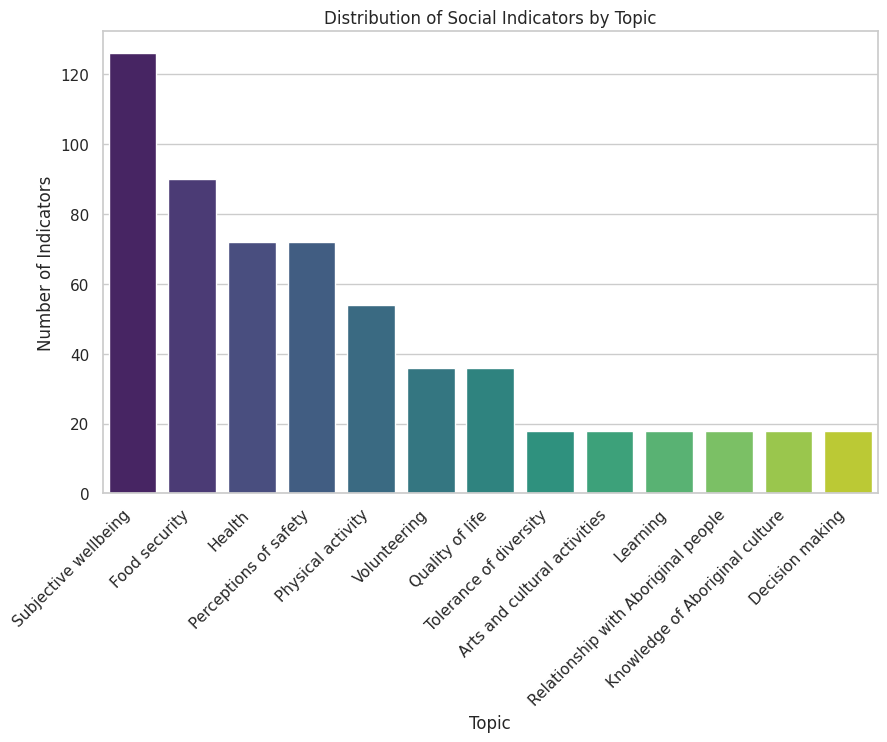

In [96]:
#Plotting distribution of social indicators by topic
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of indicators per topic
topic_counts = df_socialindicators['topic'].value_counts()

# Plot the distribution of indicators by topic
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis', hue = topic_counts.index)
plt.title('Distribution of Social Indicators by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Indicators')
plt.xticks(rotation=45, ha='right')
plt.show()

As we can see from the bar chart above, the most common social indicator topic is subjective wellbeing, followed by food security and health and perceptions of safety. This suggests that community concerns around access to food, personal health, and safety perceptions play a vital role in shaping overall social wellbeing.

The relatively high number of indicators in these areas highlights the importance of social policies and interventions targeting these issues. On the other hand, topics with fewer indicators may represent areas that are less frequently reported but still important, potentially requiring further attention or more targeted initiatives to improve social outcomes in those areas.

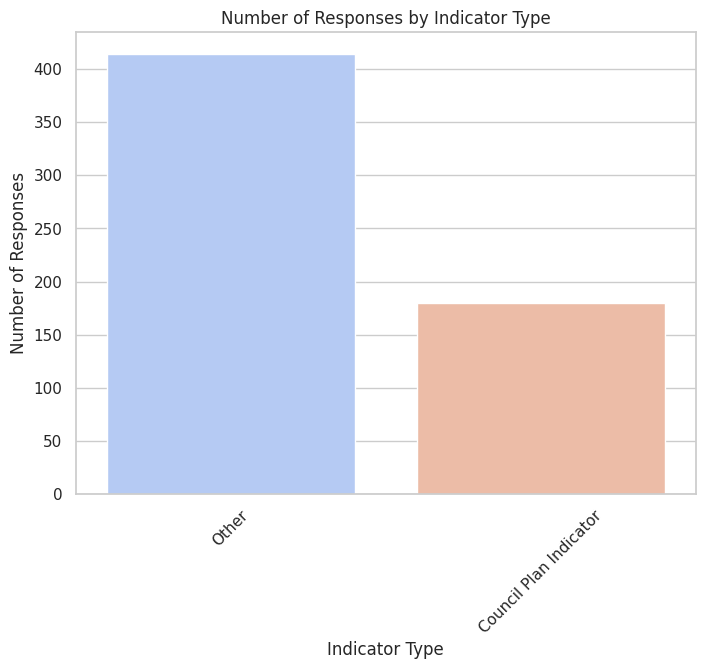

In [97]:
# Count the number of responses for each indicator type
indicator_type_counts = df_socialindicators['type'].value_counts()

# Plot the distribution of responses by indicator type
plt.figure(figsize=(8, 6))
sns.barplot(x=indicator_type_counts.index, y=indicator_type_counts.values, palette='coolwarm', hue = indicator_type_counts.index)
plt.title('Number of Responses by Indicator Type')
plt.xlabel('Indicator Type')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.show()

We can also conclude that the dataset categorizes responses into two main types: Council Plan Indicators and Other. The 'Other' category contains a higher number of indicators compared to Council Plan Indicators. This suggests that a broader range of social wellbeing factors is being recognized and reported, which may include informal or community-driven measures not directly aligned with government initiatives.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

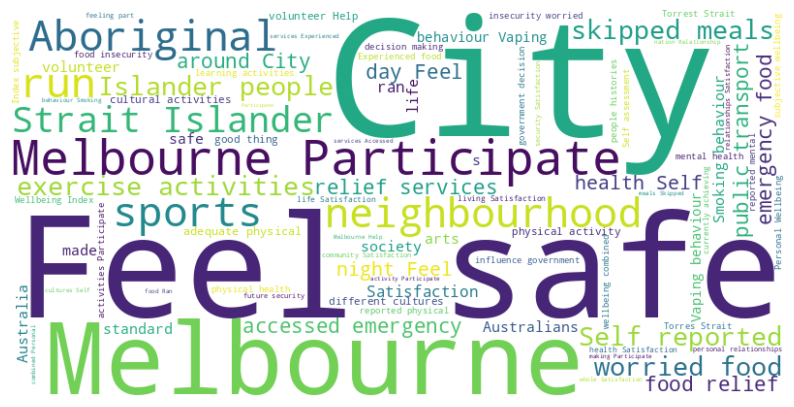

In [10]:
#wordcloud for descriptions of the social indicator topic
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into a single string
text = " ".join(description for description in df_socialindicators['description'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_width=3, contour_color='steelblue').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes
plt


The word cloud represents a more comprehensive set of social indicators. It covers a wider range of topics including safety, food security, and community engagement, in addition to the health behaviors detailed in the provided data. The word cloud prominently features "Health" and related terms.
The dataset includes indicators for smoking, vaping, and physical activity, all key health behaviors.

**Exploring the coworking dataset**

In [11]:
#Display the first few rows of the dataset to get an overview of the data structure and the types of values in each column
df_coworking.head()

,organisation,address,website,latitude,longitude,geopoint
0,11th Space,"11/568 Collins St, Melbourne VIC 3000",https://www.11thspace.com/,-37.818537,144.955502,"-37.8185368, 144.9555017"
1,360 Collins,"360 Collins Street, Melbourne 3000",https://officespace.com.au/melbourne/153369/,-37.816000,144.962000,"-37.816002, 144.962311"
2,Christie Spaces,"454 Collins St, Melbourne VIC 3000",https://www.christiespaces.com.au/spaces/,-37.817329,144.959269,"-37.8173293, 144.9592691"
3,The Cluster,"Level 17, 31 Queen Street, Melbourne, 3000",http://www.thecluster.com.au/,-37.818000,144.962000,"-37.8182314, 144.961787"
4,Hatch Quarter,"Innovation Hub 7/677 La Trobe Street, Dockland...",http://www.hatchquarter.com.au/,-37.815000,144.947000,"-37.8146, 144.94731"


In [12]:
# Display a summary of the dataset to check for number of null values
df_coworking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   organisation  44 non-null     object 
 1   address       44 non-null     object 
 2   website       44 non-null     object 
 3   latitude      43 non-null     float64
 4   longitude     43 non-null     float64
 5   geopoint      43 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.2+ KB


In [13]:
# Check for missing values in the dataset
missing_values = df_coworking.isnull().sum()

# Display the missing values
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 organisation    0
address         0
website         0
latitude        1
longitude       1
geopoint        1
dtype: int64


In [14]:
# Remove rows with missing values in specific columns
df_coworking = df_coworking.dropna(subset=['latitude', 'longitude', 'geopoint'])

# Check the dataset after removing missing values
print("Number of rows after removing missing values:", df_coworking.shape[0])

Number of rows after removing missing values: 43


In [15]:
# Showcasing the co-working spaces
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

# Add markers for each coworking space
for index, row in df_coworking.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"{row['organisation']}: {row['address']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(melbourne_map)

# Add custom legend
legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: 90px;
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>Legend</b> <br>
     &nbsp; <i class="fa fa-info-circle" style="color:blue"></i>&nbsp; Coworking Space<br>
</div>
'''

legend = folium.Marker(location=[-37.8136, 144.9631], icon=folium.DivIcon(html=legend_html))
melbourne_map.get_root().html.add_child(folium.Element(legend_html))

# Save and display the map
melbourne_map.save("coworking_spaces_map.html")
melbourne_map


In the map above, we visualize the locations of coworking spaces within the study area, providing a clear geographic representation of where these hubs of collaboration and community engagement are situated. This visualization allows us to easily identify the distribution and accessibility of coworking spaces across different neighborhoods.

**Exploring the postcodes dataset**

In [27]:
#Display the first few rows of the dataset to get an overview of the data structure and the types of values in each column
df_postcodes.head()

,geo_point_2d,geo_shape,mccid_gis,maplabel,name,xorg,mccid_str,xsource,xdate,mccid_int
0,"-37.782801479230415, 144.91100723310632","{""coordinates"": [[[[144.90659164765404, -37.78...",1,NaN,NaN,GIS Team,NaN,Mapbase,20110623,3032
1,"-37.79847805173012, 144.94482493930565","{""coordinates"": [[[[144.95359698146945, -37.79...",3,NaN,NaN,GIS Team,NaN,Mapbase,20030701,3051
2,"-37.78596017437818, 144.9506433907888","{""coordinates"": [[[[144.95359698146945, -37.79...",11,NaN,NaN,GIS Team,NaN,Mapbase,20030701,3052
3,"-37.82894848788476, 144.97861771627643","{""coordinates"": [[[[144.96824980168788, -37.81...",12,NaN,NaN,GIS Team,NaN,Mapbase,20091109,3004
4,"-37.83135640184151, 144.9122365023871","{""coordinates"": [[[[144.9200817613856, -37.819...",2,NaN,NaN,GIS Team,NaN,Mapbase,20041220,3207


In [28]:
# Display a summary of the dataset to check for number of null values
df_postcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   geo_point_2d  17 non-null     object 
 1   geo_shape     17 non-null     object 
 2   mccid_gis     17 non-null     int64  
 3   maplabel      0 non-null      float64
 4   name          0 non-null      float64
 5   xorg          17 non-null     object 
 6   mccid_str     0 non-null      float64
 7   xsource       17 non-null     object 
 8   xdate         17 non-null     int64  
 9   mccid_int     17 non-null     int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.5+ KB


In [29]:
# Drop columns that contain all non-null values
df_postcodes  = df_postcodes.drop(columns=['maplabel', 'name', 'mccid_str', 'mccid_gis', 'xorg', 'xsource', 'xdate'])

## **Investigating the relationship between coworking spaces and social wellbeing indicators**

In this section, we will investigate the relationship between coworking spaces and social wellbeing indicators using various statistical models.The goal is to map the locations of coworking spaces and visualize their proximity to various
social wellbeing indicators, including mental health, community engagement, and perceptions of safety. By analyzing these geographic relationships, we aim to identify patterns of accessibility that can inform stakeholders about areas where coworking spaces may be particularly beneficial to community wellbeing. This analysis will also highlight potential locations for developing additional coworking spaces to enhance social support within the community.

In [98]:
# Filter geographic respondent groups
geographic_indicators_df = df_socialindicators[
    df_socialindicators['respondent_group'].str.contains(r'\d{4}')  # Matches postcodes
]

In [100]:
# Extract the postcode (4 digits) from the respondent_group column using .loc
geographic_indicators_df.loc[:, 'postcode'] = geographic_indicators_df['respondent_group'].str.extract(r'(\d{4})')

# Display the first 5 rows of the updated DataFrame
geographic_indicators_df.head(5)


,indicator,type,topic,description,response,respondent_group,year,sample_size,result,format,postcode
1,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,Kensington / Flemington 3031,2023,89,16.4,Per cent,NaN
2,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,South Yarra 3141 / Melbourne/St Kilda Road 3004,2023,138,12.2,Per cent,NaN
6,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,Carlton 3053,2023,191,17.3,Per cent,NaN
7,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,Kensington / Flemington 3031,2023,89,10.0,Per cent,NaN
8,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,South Wharf / Southbank 3006,2023,147,14.9,Per cent,NaN


In [41]:
# Convert postcode columns to string type using .loc to avoid SettingWithCopyWarning
geographic_indicators_df.loc[:, 'postcode'] = geographic_indicators_df['postcode'].astype(str)
df_postcodes.loc[:, 'postcode'] = df_postcodes['mccid_int'].astype(str)

# Merged the 2 dataframes based on postcodes
merged_social_indicator_df = pd.merge(geographic_indicators_df, df_postcodes, on='postcode', how='left')

# Dropping the mccid_int column after merging
merged_social_indicator_df = merged_social_indicator_df.drop(columns=['mccid_int'])

# Display the first 5 rows of the merged dataframe
merged_social_indicator_df.head(5)

# Splitting the geo_point_2d column into separate latitude and longitude columns
merged_social_indicator_df[['latitude', 'longitude']] = merged_social_indicator_df['geo_point_2d'].str.split(',', expand=True)

# Convert latitude and longitude to numeric
merged_social_indicator_df['latitude'] = pd.to_numeric(merged_social_indicator_df['latitude'])
merged_social_indicator_df['longitude'] = pd.to_numeric(merged_social_indicator_df['longitude'])

# Display the updated dataframe
merged_social_indicator_df.head(5)



,indicator,type,topic,description,response,respondent_group,year,sample_size,result,format,postcode,geo_point_2d,geo_shape,latitude,longitude
0,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,Kensington / Flemington 3031,2023,89,16.4,Per cent,3031,"-37.79215550566622, 144.92130845946264","{""coordinates"": [[[[144.9360757084024, -37.802...",-37.792156,144.921308
1,18,Other,Health,Smoking behaviour,Reported as smoke daliy or smoke occassionally,South Yarra 3141 / Melbourne/St Kilda Road 3004,2023,138,12.2,Per cent,3141,"-37.83759427054876, 144.98291661287664","{""coordinates"": [[[[144.98502208625717, -37.84...",-37.837594,144.982917
2,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,Carlton 3053,2023,191,17.3,Per cent,3053,"-37.80045170188581, 144.96814562437285","{""coordinates"": [[[[144.96463171674174, -37.79...",-37.800452,144.968146
3,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,Kensington / Flemington 3031,2023,89,10.0,Per cent,3031,"-37.79215550566622, 144.92130845946264","{""coordinates"": [[[[144.9360757084024, -37.802...",-37.792156,144.921308
4,19,Other,Health,Vaping behaviour,Reported as vape daliy or vape occassionally,South Wharf / Southbank 3006,2023,147,14.9,Per cent,3006,"-37.82528488738265, 144.96197101435533","{""coordinates"": [[[[144.96824980168788, -37.81...",-37.825285,144.961971


In [42]:
# Convert latitude and longitude to float for comparison
merged_social_indicator_df['latitude'] = merged_social_indicator_df['latitude'].astype(float)
merged_social_indicator_df['longitude'] = merged_social_indicator_df['longitude'].astype(float)

df_coworking['latitude'] = df_coworking['latitude'].astype(float)
df_coworking['longitude'] = df_coworking['longitude'].astype(float)

In [48]:
from geopy.distance import geodesic

# Function to find the nearest coworking space using Haversine distance
def find_nearest_haversine_with_name(row):
    lat, lon = row['latitude'], row['longitude']

    # Calculate the distances to all coworking spaces
    distances = df_coworking.apply(lambda x: geodesic((lat, lon), (x['latitude'], x['longitude'])).kilometers, axis=1)

    # Get the index of the nearest coworking space
    nearest_index = distances.idxmin()

    # Return the minimum distance and the name of the nearest coworking space
    return pd.Series({
        'nearest_coworking_distance': distances.min(),
        'nearest_coworking_name': df_coworking.loc[nearest_index, 'organisation']  # Replace with actual name column
    })

# Apply the function to calculate the nearest distances and names for all respondents
merged_social_indicator_df[['nearest_coworking_distance', 'nearest_coworking_name']] = merged_social_indicator_df.apply(find_nearest_haversine_with_name, axis=1)

# Display the result
merged_social_indicator_df[['postcode', 'nearest_coworking_distance', 'nearest_coworking_name']].head()


,postcode,nearest_coworking_distance,nearest_coworking_name
0,3031,2.674381,Our Community House
1,3141,2.172631,ACMI X
2,3053,0.290472,Creative Cubes
3,3031,2.674381,Our Community House
4,3006,0.364609,Space & Co


In the section above, we are calculating the distance between each respondent's location which is based on their latitude and longitude and the nearest coworking space using the Haversine distance formula. This formula provides an accurate measure of distance on the Earth’s surface by accounting for its curvature, unlike the straight-line or Euclidean distance.

We use the geopy library to apply this calculation. For each respondent, we compare their location to all coworking spaces, compute the distance to each one, and then determine the shortest distance (i.e., the nearest coworking space). This helps us understand how physically close individuals are to coworking spaces, which we can later analyze in relation to social wellbeing indicators.

### **Fitting a linear regression model**

In [86]:
import statsmodels.api as sm

# Select relevant columns for the regression model
X = merged_social_indicator_df[['nearest_coworking_distance', 'sample_size']]  # Independent variable: distance to coworking space, control variable: sample size
y = merged_social_indicator_df['result']  # Dependent variable: social indicator result (percentage of smoking/vaping)

# Add a constant term (intercept) to the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2951
Date:                Wed, 25 Sep 2024   Prob (F-statistic):              0.745
Time:                        09:31:49   Log-Likelihood:                -1399.0
No. Observations:                 297   AIC:                             2804.
Df Residuals:                     294   BIC:                             2815.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

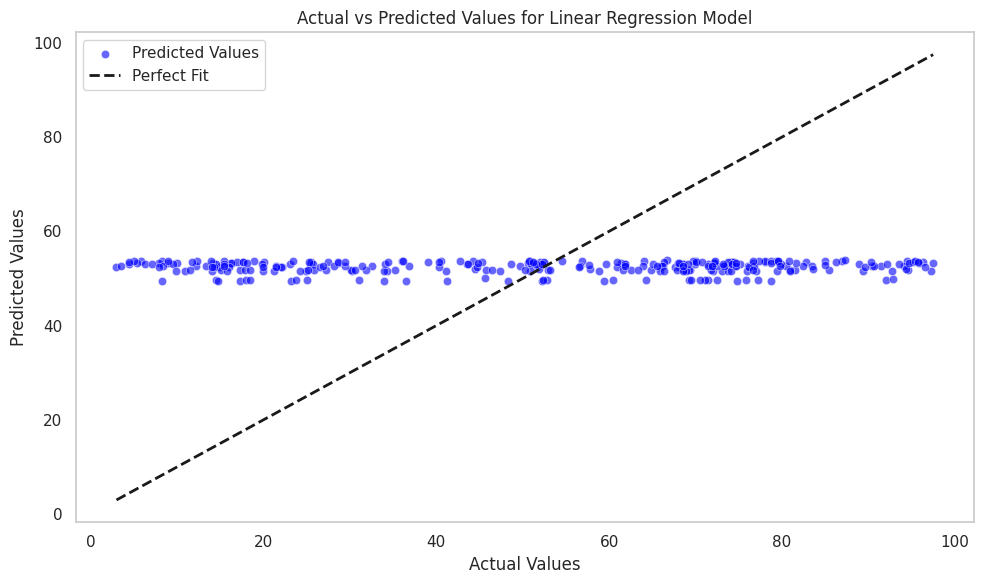

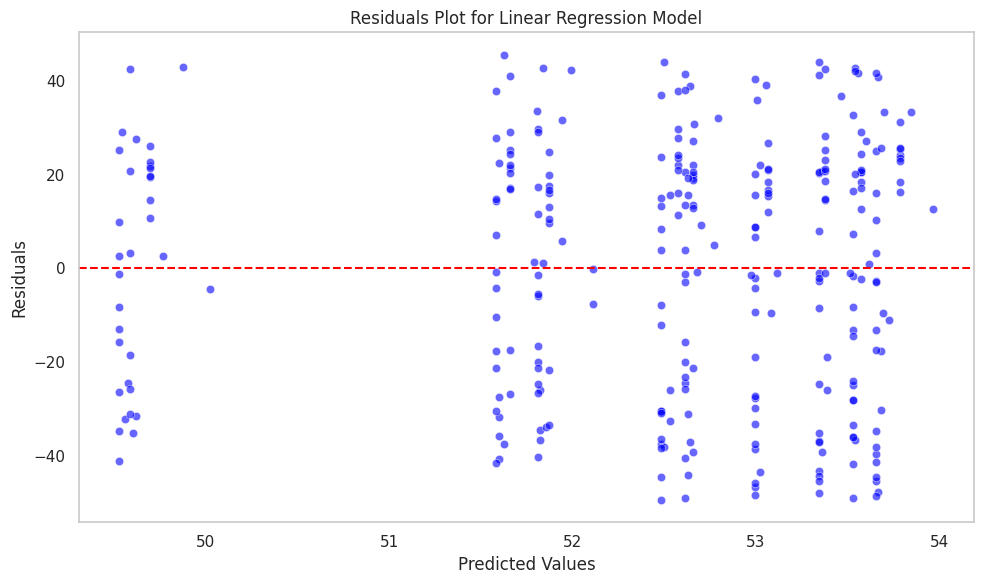

In [87]:
# Predictions from the linear regression model
y_pred = model.predict(X)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', alpha=0.6, label='Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Fit')  # Diagonal line for perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression Model')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Residuals plot
residuals = y - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', ls='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Linear Regression Model')
plt.grid()
plt.tight_layout()
plt.show()


**Explanation of the result:**

**R-squared**: 0.002

This indicates that only about 0.2% of the variance in the smoking/vaping behavior (the dependent variable) can be explained by the model. This suggests that the model has very little relevance.

**Adjusted R-squared**: -0.005

The adjusted R-squared value is negative which means that the model does not fit the data well when considering the number of predictors. Typically, this indicates that the model might be too simple or not capturing the underlying relationships.

**F-statistic**: 0.2951

P-value: 0.745

The F-statistic tests whether at least one of the predictors (in this case, distance to the nearest coworking space and sample size) is statistically significant. A p-value greater than 0.05 (in this case, 0.745) suggests that the model is not statistically significant overall.

**Coefficients:**

1. Intercept (const):

  Coefficient: 54.6898

  When the distance to the nearest coworking space and the sample size are both zero, the estimated percentage of smoking/vaping is approximately 54.69%. This serves as a baseline value.

2. Nearest Coworking Distance:

  Coefficient: -0.0038

  P-value: 0.999

  The negative coefficient suggests a very slight negative relationship between the distance to the nearest coworking space and smoking/vaping percentage. However the p-value (0.999) indicates that this relationship is not statistically significant, meaning we cannot confidently say that distance affects smoking/vaping behavior.

3. Sample Size:

  Coefficient: -0.0150

  P-value: 0.537

  The negative coefficient indicates that, all else being equal, an increase in sample size is associated with a decrease in the percentage of smoking/vaping. However, the p-value (0.537) shows that this result is not statistically significant.

**Conclusions:**

The model does not explain the variability in smoking/vaping behavior well, as indicated by the low R-squared value. None of the predictors (nearest coworking distance and sample size) are statistically significant, indicating that we cannot draw strong conclusions about their impacts on smoking/vaping behavior from this model.

### **Performing ANOVA Analysis**

In [56]:
# Check the unique indicators from the dataset
unique_indicators = merged_social_indicator_df['topic'].unique()
print("Unique Indicators:", unique_indicators)


Unique Indicators: ['Health' 'Physical activity' 'Tolerance of diversity' 'Volunteering'
 'Arts and cultural activities' 'Learning'
 'Relationship with Aboriginal people' 'Knowledge of Aboriginal culture'
 'Decision making' 'Food security' 'Perceptions of safety'
 'Quality of life' 'Subjective wellbeing']


In [57]:
# Categorizing nearest coworking distances
def categorize_distance(distance):
    if distance < 1:
        return '< 1 km'
    elif 1 <= distance < 5:
        return '1-5 km'
    else:
        return '> 5 km'

# Apply the function to create a new column for distance categories
merged_social_indicator_df['distance_category'] = merged_social_indicator_df['nearest_coworking_distance'].apply(categorize_distance)

# Display the first few rows to verify the new column
print(merged_social_indicator_df[['nearest_coworking_distance', 'distance_category']].head())


   nearest_coworking_distance distance_category
0                    2.674381            1-5 km
1                    2.172631            1-5 km
2                    0.290472            < 1 km
3                    2.674381            1-5 km
4                    0.364609            < 1 km


In [58]:
from scipy import stats

# Perform ANOVA for each unique indicator
results = {}

for indicator in unique_indicators:
    # Filter data for the current indicator
    indicator_data = merged_social_indicator_df[merged_social_indicator_df['topic'] == indicator]

    # Prepare data for ANOVA
    anova_data = indicator_data[['result', 'distance_category']]

    # Group the data by distance category
    groups = anova_data.groupby('distance_category')['result'].apply(list)

    # Perform ANOVA
    f_statistic, p_value = stats.f_oneway(*groups)

    results[indicator] = {
        'F-statistic': f_statistic,
        'p-value': p_value
    }

# Display ANOVA results
for indicator, result in results.items():
    print(f"Indicator: {indicator}, F-statistic: {result['F-statistic']}, p-value: {result['p-value']}")



Indicator: Health, F-statistic: 0.04100578859653322, p-value: 0.8407336410570242
Indicator: Physical activity, F-statistic: 1.912466145707063, p-value: 0.17891788903521255
Indicator: Tolerance of diversity, F-statistic: 0.821515892420538, p-value: 0.39486501970647553
Indicator: Volunteering, F-statistic: 0.8536361952965865, p-value: 0.36925055457577466
Indicator: Arts and cultural activities, F-statistic: 0.0695134061569017, p-value: 0.7996394578354242
Indicator: Learning, F-statistic: 0.897711231274665, p-value: 0.37494828201795577
Indicator: Relationship with Aboriginal people, F-statistic: 2.2027429032420742, p-value: 0.18133876461944803
Indicator: Knowledge of Aboriginal culture, F-statistic: 0.3369517959074906, p-value: 0.5797924192554766
Indicator: Decision making, F-statistic: 0.02214944547281148, p-value: 0.8858870152688273
Indicator: Food security, F-statistic: 0.4124641664846889, p-value: 0.524130909416757
Indicator: Perceptions of safety, F-statistic: 0.028204737856516452, p

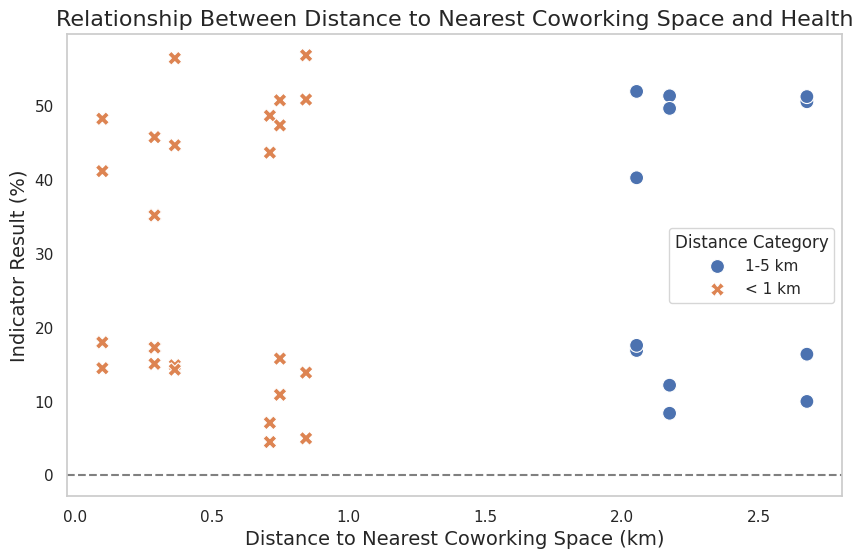

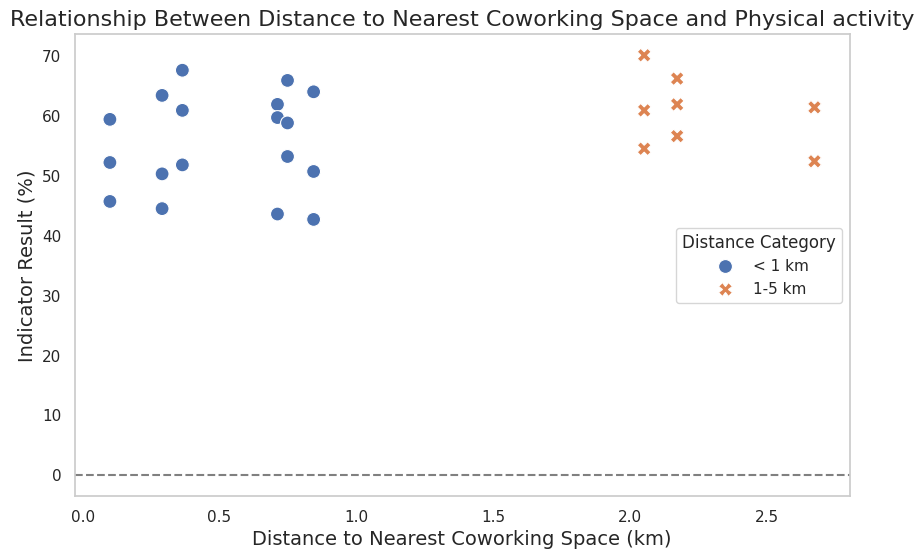

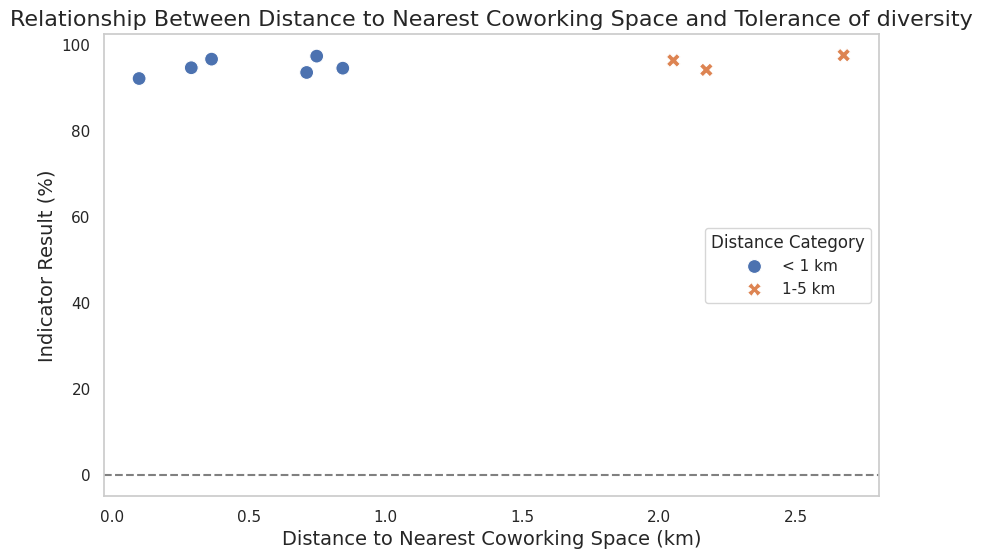

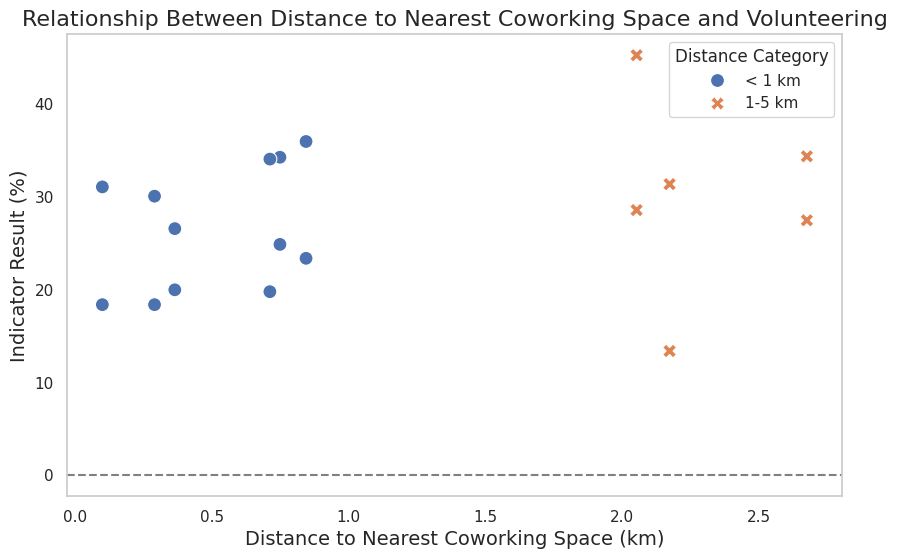

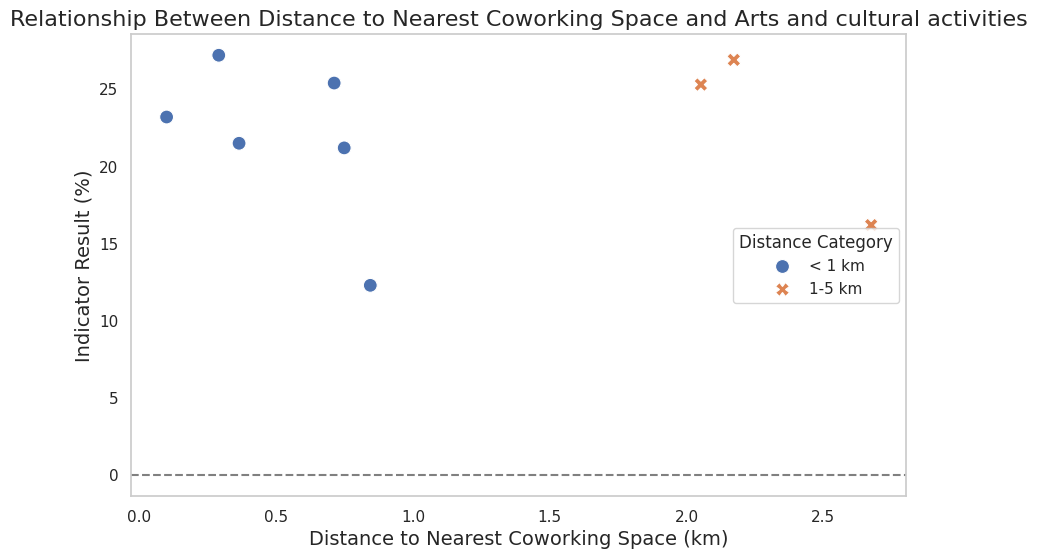

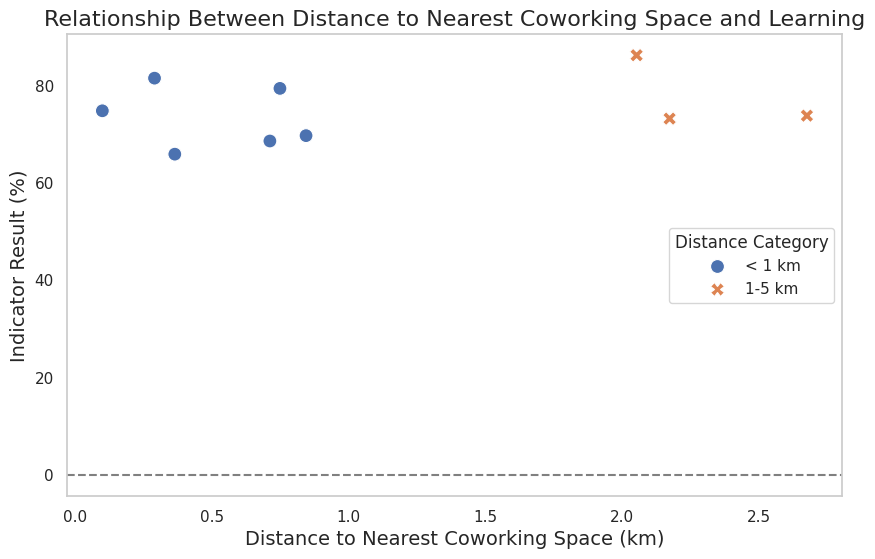

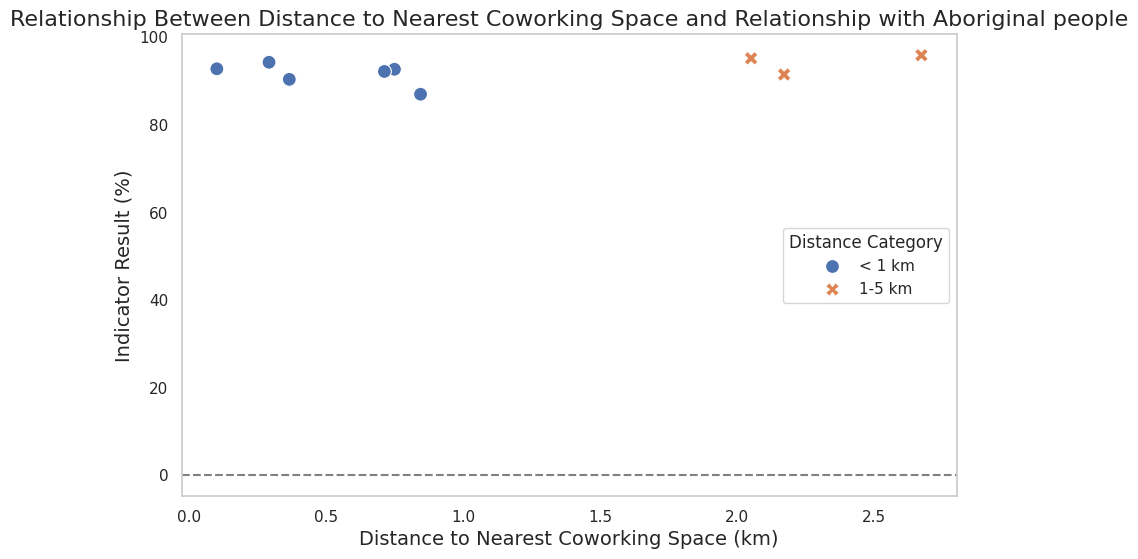

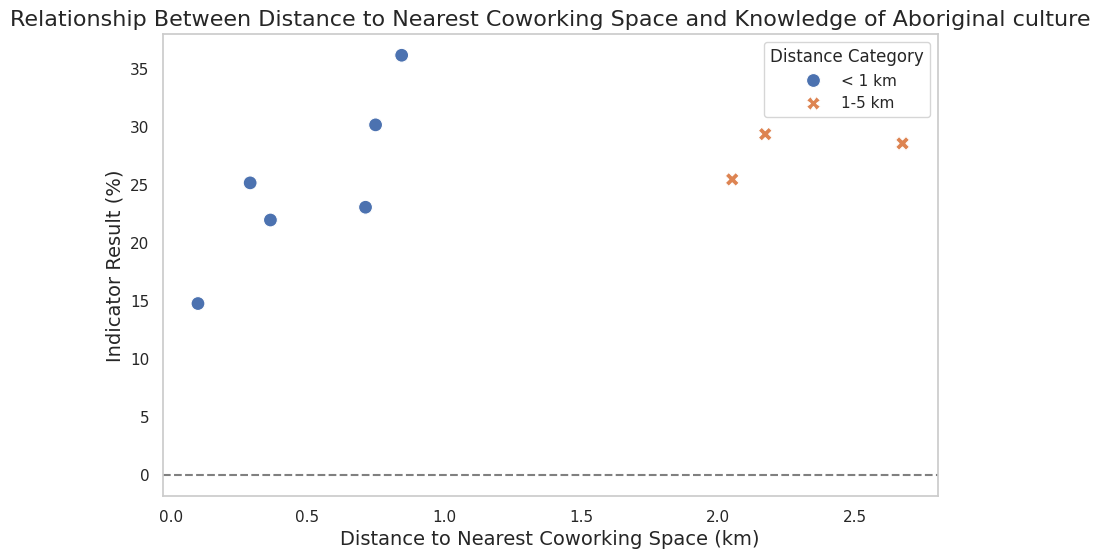

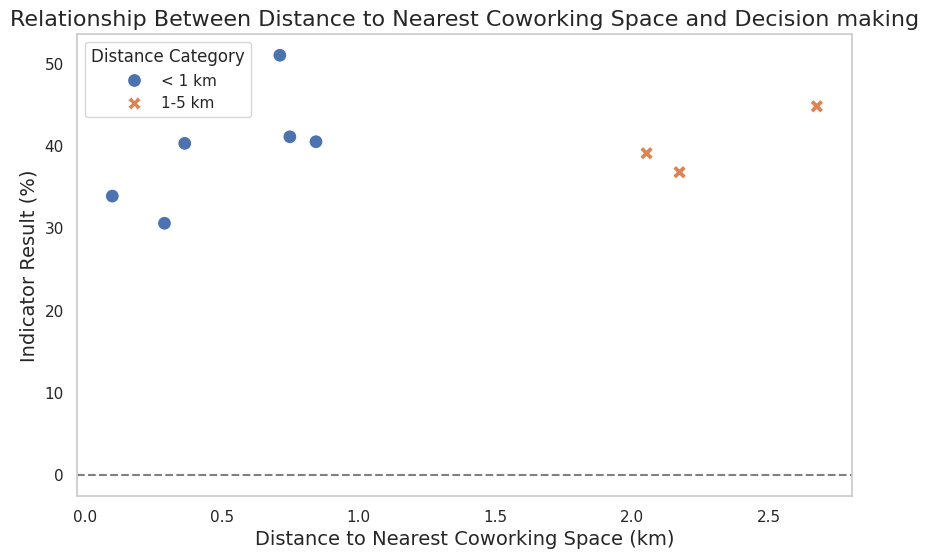

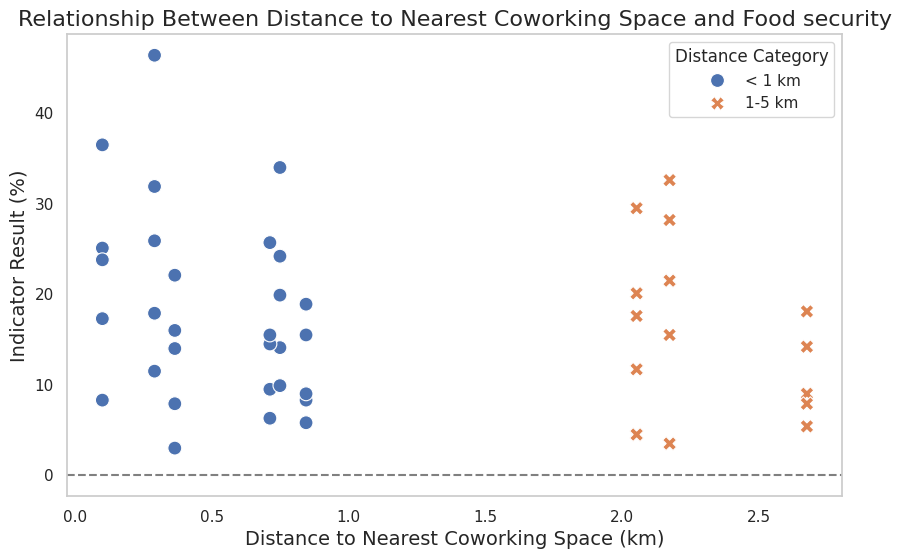

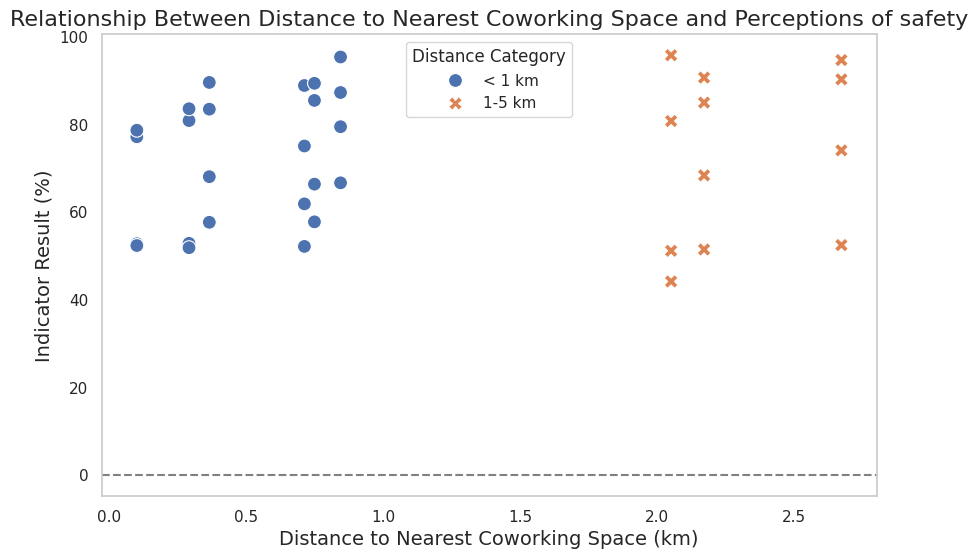

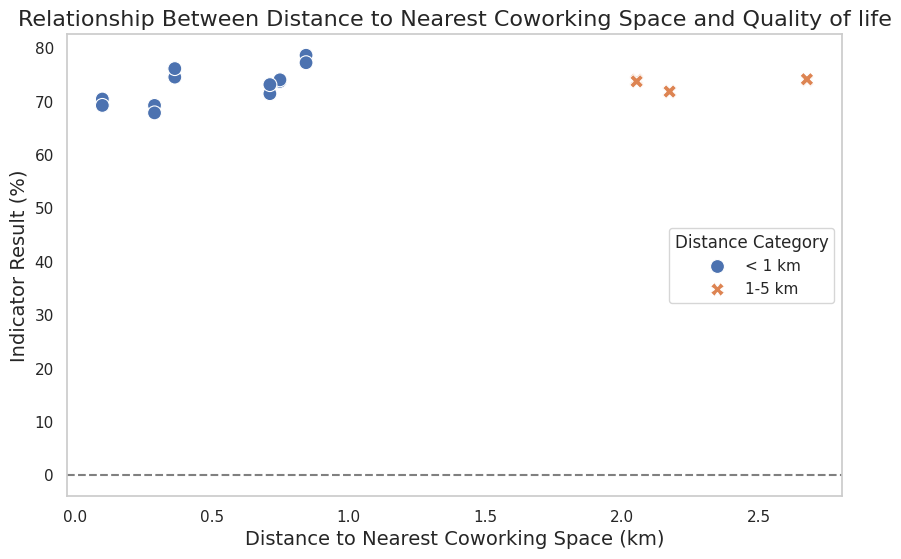

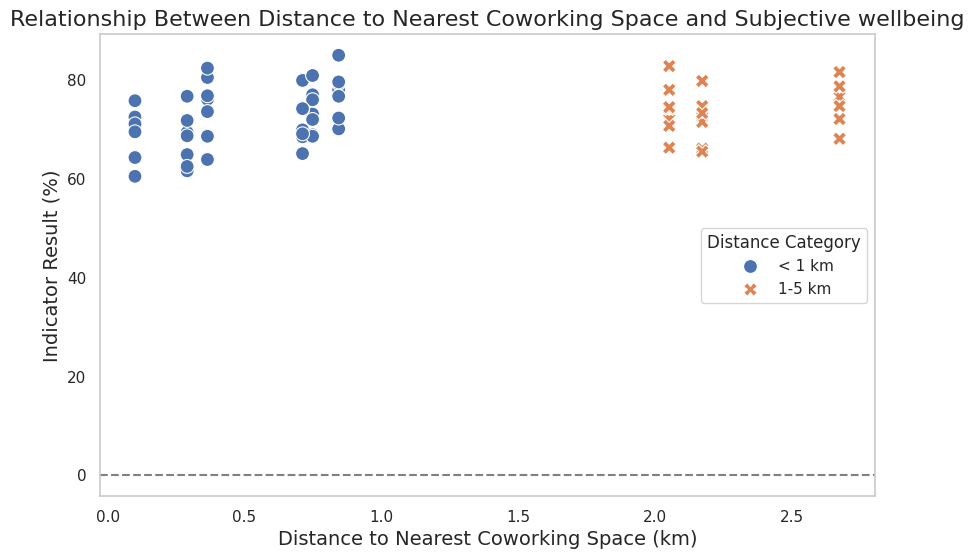

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Loop through each indicator to create scatter plots
for indicator in unique_indicators:
    indicator_data = merged_social_indicator_df[merged_social_indicator_df['topic'] == indicator]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=indicator_data,
                     x='nearest_coworking_distance',
                     y='result',
                     hue='distance_category',
                     style='distance_category',
                     s=100)

    # Add labels and title
    plt.title(f'Relationship Between Distance to Nearest Coworking Space and {indicator}', fontsize=16)
    plt.xlabel('Distance to Nearest Coworking Space (km)', fontsize=14)
    plt.ylabel('Indicator Result (%)', fontsize=14)
    plt.axhline(y=0, color='gray', linestyle='--')  # Optional: Add a horizontal line at y=0
    plt.legend(title='Distance Category')
    plt.grid()
    plt.show()


**Explanation of results:**

* No statistically significant relationships: None of the social indicators showed a significant relationship with proximity to coworking spaces (all p-values > 0.05).
* Closest to significance: "Relationship with Aboriginal people" (p = 0.1813) showed the strongest trend, though still not statistically significant.
Least significant: "Decision making" (p = 0.8859) showed almost no relationship.

Based on these results, we cannot conclude that proximity to coworking spaces has a substantial impact on any of the measured social indicators.
Considerations: Sample size, potential small effects, and other unmeasured variables might influence these results.

### **Performing a correlation analysis**

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'result' to numeric, if it's not already
merged_social_indicator_df['result'] = pd.to_numeric(merged_social_indicator_df['result'], errors='coerce')

# Select only the relevant columns for correlation analysis
correlation_data = merged_social_indicator_df[['result', 'nearest_coworking_distance', 'sample_size']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()
print(correlation_matrix)


                              result  nearest_coworking_distance  sample_size
result                      1.000000                    0.026521    -0.044756
nearest_coworking_distance  0.026521                    1.000000    -0.594359
sample_size                -0.044756                   -0.594359     1.000000


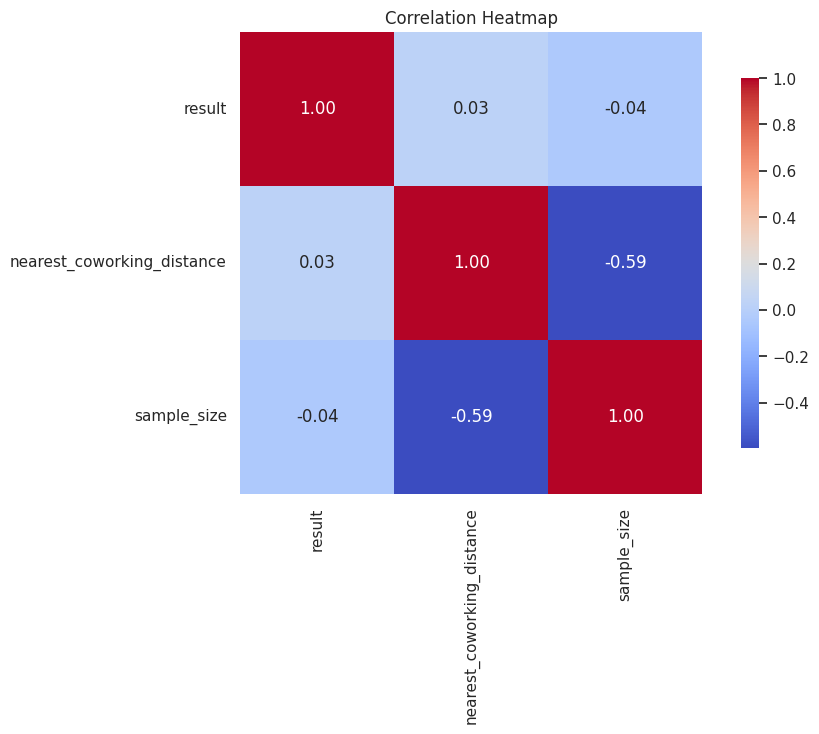

In [61]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Heatmap')
plt.show()


**Explanation of results:**

Weak Relationships: The very weak correlations between the outcome metric and the other two variables suggest that distance to coworking spaces and sample size do not have a strong impact on the result metric.

Significant Negative Correlation: The moderate negative correlation between distance to coworking spaces and sample size may indicate geographic or demographic factors influencing both the presence of coworking spaces and the number of respondents in a given area.

### **Performing a regression analysis with interaction term**

In [63]:
import statsmodels.api as sm

# Example: Add an interaction term
merged_social_indicator_df['interaction'] = merged_social_indicator_df['nearest_coworking_distance'] * merged_social_indicator_df['sample_size']
X = merged_social_indicator_df[['nearest_coworking_distance', 'sample_size', 'interaction']]
y = merged_social_indicator_df['result']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2011
Date:                Wed, 25 Sep 2024   Prob (F-statistic):              0.896
Time:                        08:37:13   Log-Likelihood:                -1398.9
No. Observations:                 297   AIC:                             2806.
Df Residuals:                     293   BIC:                             2821.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

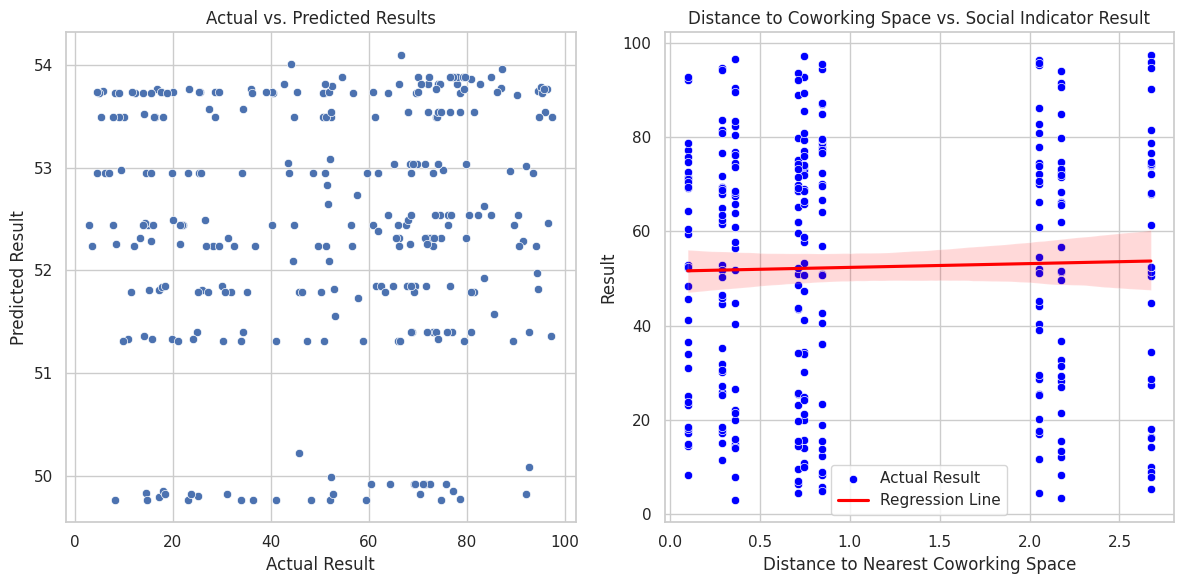

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict values based on the model
merged_social_indicator_df['predicted_result'] = model.predict(X)

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=merged_social_indicator_df['result'],
                y=merged_social_indicator_df['predicted_result'])
plt.xlabel('Actual Result')
plt.ylabel('Predicted Result')
plt.title('Actual vs. Predicted Results')

# Plot for nearest_coworking_distance vs result
plt.subplot(1, 2, 2)
sns.scatterplot(x=merged_social_indicator_df['nearest_coworking_distance'],
                y=merged_social_indicator_df['result'],
                color='blue', label='Actual Result')

# Add regression line
sns.regplot(x=merged_social_indicator_df['nearest_coworking_distance'],
            y=merged_social_indicator_df['result'],
            scatter=False, color='red', label='Regression Line')

plt.xlabel('Distance to Nearest Coworking Space')
plt.ylabel('Result')
plt.title('Distance to Coworking Space vs. Social Indicator Result')
plt.legend()
plt.tight_layout()

# Show plots
plt.show()


Explanation of the regression analysis with interaction term:

* Weak relationship: The regression line is nearly flat, with only a very slight positive slope. This indicates a very weak positive relationship between the distance to coworking spaces and the social indicator result.
* Wide spread of data: The actual results (blue dots) are widely scattered across the plot, without clustering tightly around the regression line. This suggests high variability in the data that isn't explained by the distance to coworking spaces alone.
* Minimal effect: The slight upward slope of the regression line suggests that as distance to coworking spaces increases, there's a very small tendency for the social indicator result to increase. However, this effect appears to be minimal given the wide scatter of data points.


### **Implementing machine learning models**

In this section, machine learning models will be applied namely:

*   Random Forest
*   Gradien Boosting

These models will be able to predict social indicator outcomes based on proximity to coworking spaces and other features in your dataset. This can help identify non-linear relationships.

In [70]:
# Perform one-hot encoding on the 'topic' column
topic_types = pd.get_dummies(merged_social_indicator_df['topic'], prefix='topic', drop_first=True)

# Combine the new one-hot encoded features with the original DataFrame
merged_social_indicator_df = pd.concat([merged_social_indicator_df, topic_types], axis=1)

# Display the updated DataFrame with one-hot encoded topics
print(merged_social_indicator_df.head())


  indicator   type   topic        description  \
0        18  Other  Health  Smoking behaviour   
1        18  Other  Health  Smoking behaviour   
2        19  Other  Health   Vaping behaviour   
3        19  Other  Health   Vaping behaviour   
4        19  Other  Health   Vaping behaviour   

                                         response  \
0  Reported as smoke daliy or smoke occassionally   
1  Reported as smoke daliy or smoke occassionally   
2    Reported as vape daliy or vape occassionally   
3    Reported as vape daliy or vape occassionally   
4    Reported as vape daliy or vape occassionally   

                                  respondent_group  year  sample_size  result  \
0                     Kensington / Flemington 3031  2023           89    16.4   
1  South Yarra 3141 / Melbourne/St Kilda Road 3004  2023          138    12.2   
2                                     Carlton 3053  2023          191    17.3   
3                     Kensington / Flemington 3031  2023      

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the one-hot encoded topic features (all columns starting with 'topic_')
topic_features = merged_social_indicator_df.filter(like='topic_').columns.tolist()
X = merged_social_indicator_df[['nearest_coworking_distance', 'sample_size'] + topic_features]  # Add the one-hot encoded features
y = merged_social_indicator_df['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R^2: {r2_rf}")

# Create and fit the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate metrics for Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MAE: {mae_gb}")
print(f"Gradient Boosting R^2: {r2_gb}")




Random Forest MAE: 7.294103671652425
Random Forest R^2: 0.8526252606732657
Gradient Boosting MAE: 7.545069743124646
Gradient Boosting R^2: 0.851565763946177


**Explanation:**
Both models show comparable performance with low MAE values and high R² values, indicating effective predictive capabilities.
The Random Forest model performs slightly better in terms of MAE, suggesting it might provide slightly more accurate predictions than the Gradient Boosting model.
The high R² values for both models indicate that the independent variables used (including distance to coworking spaces and topics) are effective in explaining the outcomes in the dataset.

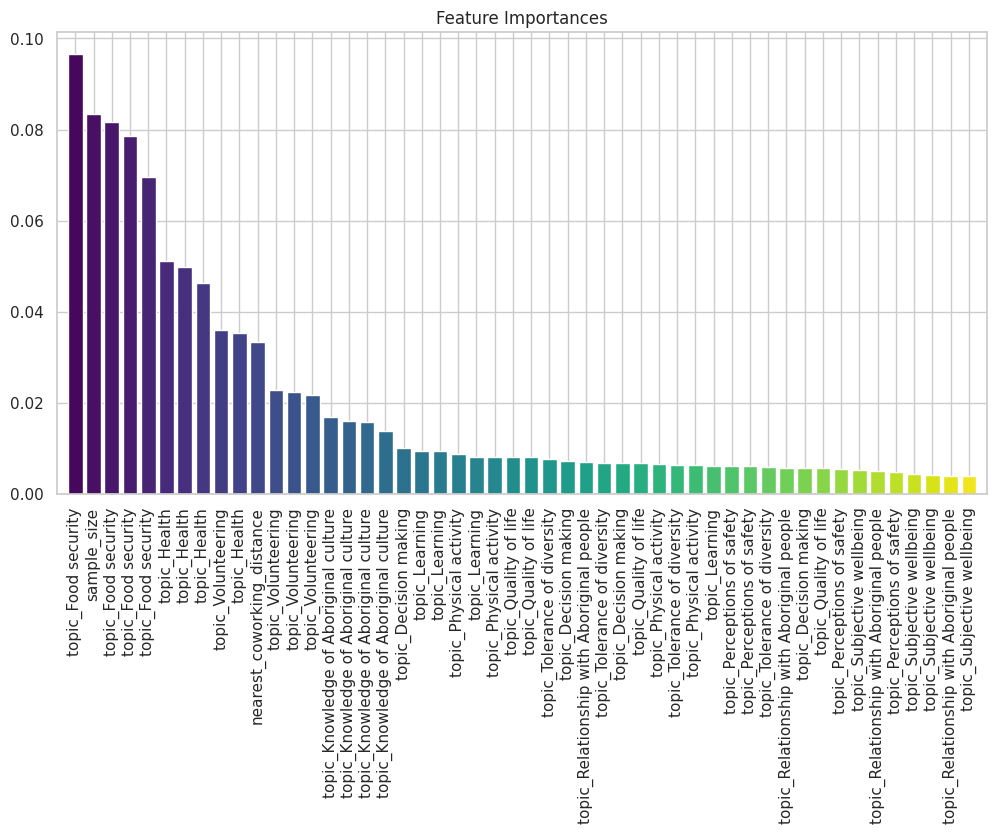

In [108]:
#Plotting the feature importances
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Create a color palette
palette = sns.color_palette("viridis", n_colors=X.shape[1])  # You can choose any palette

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")

# Use the palette colors for the bar plot
plt.bar(range(X.shape[1]), feature_importances[indices], align="center", color=palette)

plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


**Explanation:**
* Top features: Food security, sample size, and health-related topics consistently rank as the most important features. This suggests these factors have the strongest influence on your model's predictions.
* Repeated features: Some features, particularly "topic_Food security", appear multiple times with varying importance. This is characteristic of tree-based models like Random Forest and Gradient Boosting, indicating complex interactions or different aspects of these features being captured.
* Coworking space relevance: The "nearest_coworking_distance" feature appears relatively high in importance, suggesting that proximity to coworking spaces does play a role in the model, though not as significant as some social factors.

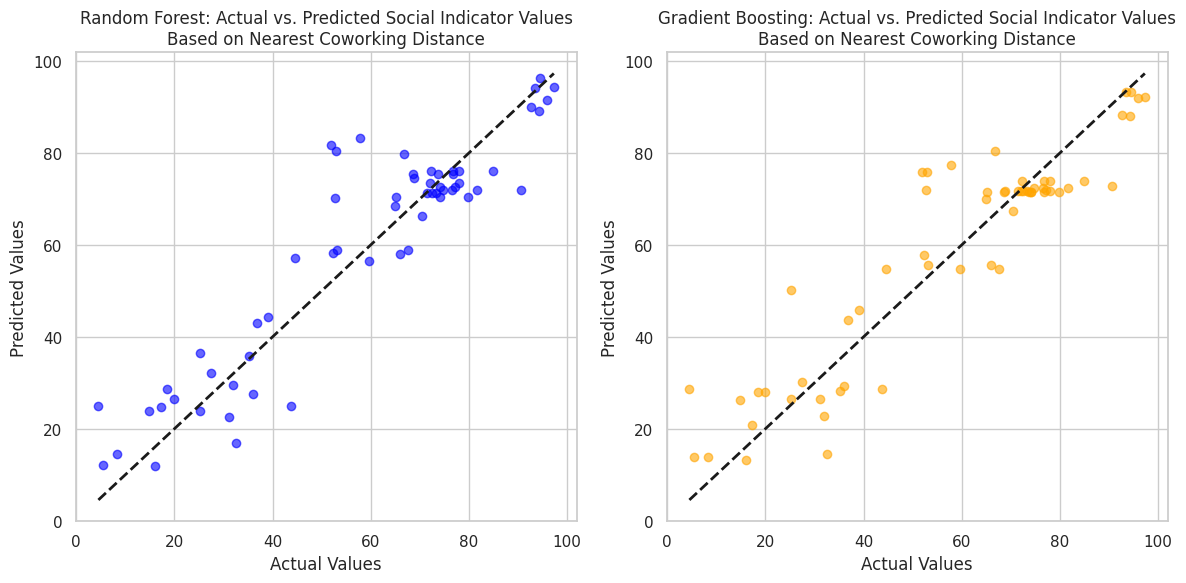

In [88]:
import matplotlib.pyplot as plt

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Random Forest Actual vs. Predicted
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs. Predicted Social Indicator Values\nBased on Nearest Coworking Distance')

# Gradient Boosting Actual vs. Predicted
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(y_test, y_pred_gb, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting: Actual vs. Predicted Social Indicator Values\nBased on Nearest Coworking Distance')

# Show the plots
plt.tight_layout()
plt.show()


**Explanation:**

Random Forest:  Most of the data points are clustered around the trend line, suggesting a good fit, although there are some deviations, especially in the middle range of the actual values.

Gradient Boosting:The data points in this plot also closely follow the trend line, indicating that the Gradient Boosting model also performs well. The clustering around the trend line appears slightly tighter compared to the Random Forest model, suggesting potentially better accuracy or less variance in predictions.


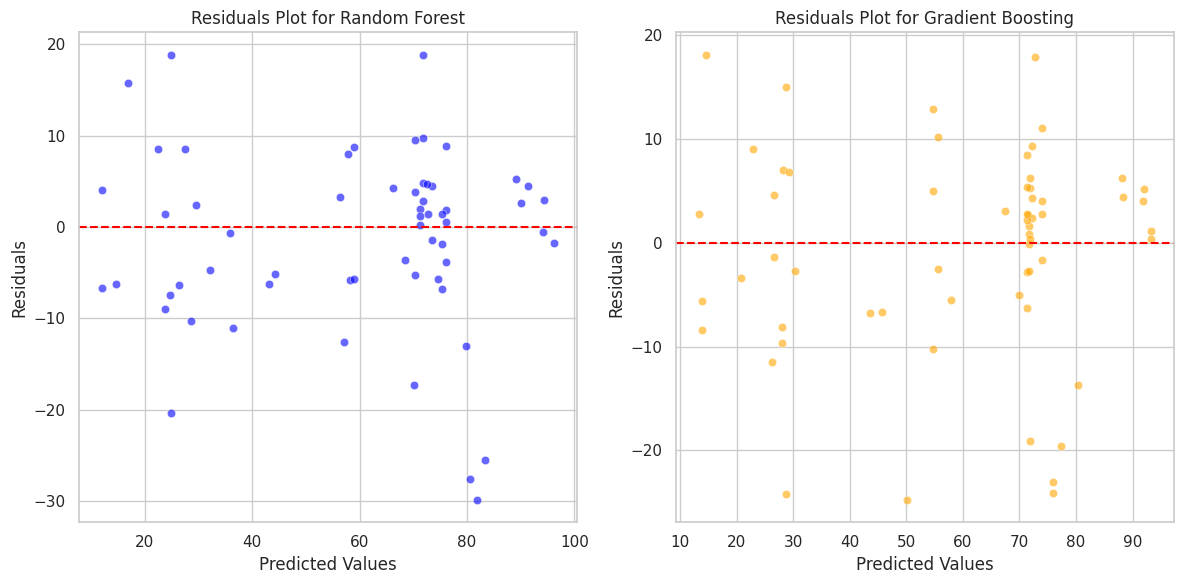

In [85]:
# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Residuals Plot for Random Forest
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
residuals_rf = y_test - y_pred_rf
sns.scatterplot(x=y_pred_rf, y=residuals_rf, color='blue', alpha=0.6)
plt.axhline(0, color='red', ls='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Random Forest')

# Residuals Plot for Gradient Boosting
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
residuals_gb = y_test - y_pred_gb
sns.scatterplot(x=y_pred_gb, y=residuals_gb, color='orange', alpha=0.6)
plt.axhline(0, color='red', ls='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Gradient Boosting')

# Show the plots
plt.tight_layout()
plt.show()




Both residual plots appear to be evenly distributed around the horizontal line and there’s no clear pattern, it suggests that both models have captured the relationships in the data well.

# **Conclusion**
The analysis of the impact of coworking spaces on social wellbeing indicators resulted in the following key insights:

Linear Regression Analysis:

The linear regression model indicated a very low R² of 0.002, suggesting that it explained only 0.2% of the variance in the indicators, implying that the predictors used were not effective.
None of the predictors showed statistical significance, highlighting that the model does not capture the underlying relationships effectively.

ANOVA Results:

Various wellbeing indicators (e.g., health, physical activity) did not demonstrate significant relationships with coworking space proximity, with F-statistics indicating a lack of statistical significance across the board.


Model Performance:

The Random Forest model demonstrated a strong fit with an R² of 0.853, indicating that approximately 85.3% of the variance in social wellbeing outcomes can be explained by the proximity to coworking spaces.
The Gradient Boosting model also performed well, with an R² of 0.852, showing similar predictive capabilities.

Limitations and Recommendations:

Further Research: Explore areas with a higher density of coworking spaces to assess their impact on social wellbeing indicators more comprehensively.
Conduct a targeted social indicator study focusing specifically on location-based metrics to gain deeper insights into the effects of coworking spaces on community wellbeing. This approach will help address limitations in the current dataset, which was filtered to include respondents based solely on location, potentially excluding valuable data related to other influencing factors.

Data Enrichment: Explore qualitative data to complement quantitative findings and provide a more comprehensive understanding of coworking spaces' impact on social wellbeing.

Policy Implications: Stakeholders should consider enhancing coworking space features and accessibility to optimize their role as community support environments.